## Note

Usually it's a good practice to apply following formula in order to find out the total number of hidden layers needed.

Nh = Ns/(α∗ (Ni + No))

where

Ni = number of input neurons.

No = number of output neurons.

Ns = number of samples in training data set.

α = an arbitrary scaling factor usually 2-10.


## Our Values

Ni = 8 (features?)

No = 1 (1 target variable)

Ns = 109 (rows)

a = 5 (starting here and can play around with this number)

so Nh ~ 3

In [11]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from keras.layers.core import Dropout



# Importing the dataset
dataset = np.genfromtxt('HS_Regents_Sat_Scores_2015_v2.csv', delimiter=',')
X = dataset[1:, 4:-4]
print(X)
Y = dataset[1:, -1]
print(Y)

[[52.6 71.9 66.4 61.  64.3 64.4 63.  64.7]
 [64.2 72.5 65.  66.9 63.5 70.8 65.7 71.5]
 [77.  74.  80.9 81.8 71.6 84.8 67.9 80.2]
 [81.2 88.2 84.2 90.9 88.2 90.7 83.1 79.9]
 [81.4 75.7 79.6 88.9 80.5 87.5 76.9 72.4]
 [64.  78.  72.1 72.6 72.6 73.2 73.1 74.1]
 [84.3 93.1 74.8 79.6 72.9 76.9 71.2 79.4]
 [92.9 91.5 93.1 94.3 93.7 93.6 88.7 91.5]
 [48.5 78.5 68.7 68.9 69.4 74.4 59.1 52.3]
 [51.3 74.6 64.3 60.2 68.3 64.3 54.2 50.4]
 [45.9 72.8 59.4 74.8 69.2 75.1 61.2 36.5]
 [67.8 83.2 75.5 81.  73.3 81.  66.2 63.2]
 [64.3 72.3 68.  65.  71.3 73.2 57.5 54.7]
 [81.9 78.2 82.5 85.1 84.7 83.  84.3 77.8]
 [56.  80.5 68.6 69.9 65.3 80.1 79.5 74.6]
 [54.9 74.3 70.5 68.1 64.7 75.8 63.1 71.7]
 [81.7 61.6 61.8 62.8 64.1 70.3 69.8 66.7]
 [61.5 79.  74.6 76.7 71.4 74.8 74.1 80.7]
 [73.4 84.6 80.9 87.4 76.9 89.5 72.1 70.2]
 [42.4 67.7 55.6 63.2 58.8 64.2 53.4 48.8]
 [81.4 85.6 78.5 87.7 78.7 86.6 75.3 66. ]
 [76.9 83.1 77.5 80.  78.9 82.8 73.5 74.5]
 [58.2 76.5 69.2 77.6 76.4 80.5 68.9 68.7]
 [55.  67.2

Epoch 1/100
87/87 [==============================] - 4s 50ms/step - loss: 1834234.5460
Epoch 2/100
87/87 [==============================] - 0s 629us/step - loss: 1800126.5560
Epoch 3/100
87/87 [==============================] - 0s 673us/step - loss: 1736485.0374
Epoch 4/100
87/87 [==============================] - 0s 628us/step - loss: 1644710.5158
Epoch 5/100
87/87 [==============================] - 0s 655us/step - loss: 1536157.8290
Epoch 6/100
87/87 [==============================] - 0s 643us/step - loss: 1397802.4540
Epoch 7/100
87/87 [==============================] - 0s 650us/step - loss: 1255567.9684
Epoch 8/100
87/87 [==============================] - 0s 632us/step - loss: 1083311.2486
Epoch 9/100
87/87 [==============================] - 0s 613us/step - loss: 950231.9892
Epoch 10/100
87/87 [==============================] - 0s 656us/step - loss: 788693.7733
Epoch 11/100
87/87 [==============================] - 0s 650us/step - loss: 665769.2428
Epoch 12/100
87/87 [==============

87/87 [==============================] - 0s 635us/step - loss: 24886.5636
Epoch 96/100
87/87 [==============================] - 0s 670us/step - loss: 16448.9634
Epoch 97/100
87/87 [==============================] - 0s 592us/step - loss: 20502.6439
Epoch 98/100
87/87 [==============================] - 0s 648us/step - loss: 17600.0125
Epoch 99/100
87/87 [==============================] - 0s 798us/step - loss: 19326.5210
Epoch 100/100
87/87 [==============================] - 0s 718us/step - loss: 20286.2627
The  first  neural network results: 


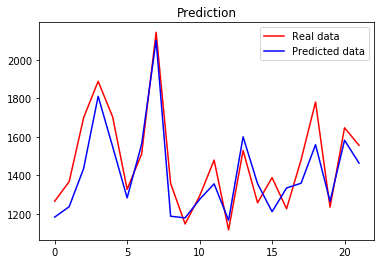

Epoch 1/100
87/87 [==============================] - 4s 51ms/step - loss: 1946798.2471
Epoch 2/100
87/87 [==============================] - 0s 604us/step - loss: 1897370.8420
Epoch 3/100
87/87 [==============================] - 0s 574us/step - loss: 1815276.9756
Epoch 4/100
87/87 [==============================] - 0s 571us/step - loss: 1704009.9885
Epoch 5/100
87/87 [==============================] - 0s 626us/step - loss: 1572469.2845
Epoch 6/100
87/87 [==============================] - 0s 591us/step - loss: 1430993.6925
Epoch 7/100
87/87 [==============================] - 0s 627us/step - loss: 1246579.6767
Epoch 8/100
87/87 [==============================] - 0s 706us/step - loss: 1091371.0014
Epoch 9/100
87/87 [==============================] - 0s 586us/step - loss: 920503.4555
Epoch 10/100
87/87 [==============================] - 0s 624us/step - loss: 742595.6545
Epoch 11/100
87/87 [==============================] - 0s 594us/step - loss: 595447.4088
Epoch 12/100
87/87 [==============

87/87 [==============================] - 0s 660us/step - loss: 18904.0568
Epoch 96/100
87/87 [==============================] - 0s 636us/step - loss: 15661.3840
Epoch 97/100
87/87 [==============================] - 0s 633us/step - loss: 16002.3776
Epoch 98/100
87/87 [==============================] - 0s 639us/step - loss: 19667.5981
Epoch 99/100
87/87 [==============================] - 0s 646us/step - loss: 19973.2103
Epoch 100/100
87/87 [==============================] - 0s 577us/step - loss: 23646.4601
The  second  neural network results: 


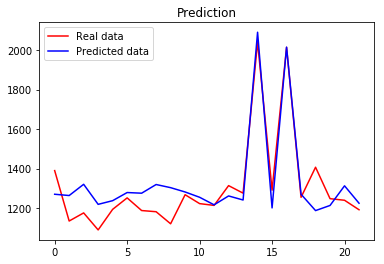

Epoch 1/100
87/87 [==============================] - 4s 51ms/step - loss: 1924811.9511
Epoch 2/100
87/87 [==============================] - 0s 612us/step - loss: 1872112.0546
Epoch 3/100
87/87 [==============================] - 0s 611us/step - loss: 1776061.0216
Epoch 4/100
87/87 [==============================] - 0s 598us/step - loss: 1645187.4957
Epoch 5/100
87/87 [==============================] - 0s 622us/step - loss: 1472855.4210
Epoch 6/100
87/87 [==============================] - 0s 620us/step - loss: 1297652.0101
Epoch 7/100
87/87 [==============================] - 0s 615us/step - loss: 1108272.1358
Epoch 8/100
87/87 [==============================] - 0s 601us/step - loss: 933730.6530
Epoch 9/100
87/87 [==============================] - 0s 622us/step - loss: 751611.6422
Epoch 10/100
87/87 [==============================] - 0s 624us/step - loss: 594036.9181
Epoch 11/100
87/87 [==============================] - 0s 607us/step - loss: 482372.2636
Epoch 12/100
87/87 [===============

87/87 [==============================] - 0s 626us/step - loss: 23566.6235
Epoch 96/100
87/87 [==============================] - 0s 605us/step - loss: 20183.5962
Epoch 97/100
87/87 [==============================] - 0s 620us/step - loss: 14554.0919
Epoch 98/100
87/87 [==============================] - 0s 608us/step - loss: 22317.8697
Epoch 99/100
87/87 [==============================] - 0s 622us/step - loss: 17988.4917
Epoch 100/100
87/87 [==============================] - 0s 597us/step - loss: 18704.0308
The  third  neural network results: 


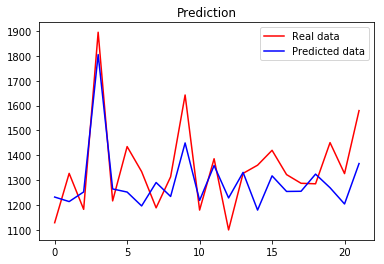

Epoch 1/100
87/87 [==============================] - 4s 51ms/step - loss: 1910609.9440
Epoch 2/100
87/87 [==============================] - 0s 600us/step - loss: 1872017.8549
Epoch 3/100
87/87 [==============================] - 0s 631us/step - loss: 1807796.5532
Epoch 4/100
87/87 [==============================] - 0s 602us/step - loss: 1717358.3721
Epoch 5/100
87/87 [==============================] - 0s 596us/step - loss: 1597236.0647
Epoch 6/100
87/87 [==============================] - 0s 590us/step - loss: 1465642.3118
Epoch 7/100
87/87 [==============================] - 0s 630us/step - loss: 1311893.5805
Epoch 8/100
87/87 [==============================] - 0s 607us/step - loss: 1142820.4267
Epoch 9/100
87/87 [==============================] - 0s 599us/step - loss: 994341.2486
Epoch 10/100
87/87 [==============================] - 0s 601us/step - loss: 834618.8908
Epoch 11/100
87/87 [==============================] - 0s 619us/step - loss: 665281.2062
Epoch 12/100
87/87 [==============

Epoch 95/100
87/87 [==============================] - 0s 647us/step - loss: 29387.1137
Epoch 96/100
87/87 [==============================] - 0s 615us/step - loss: 24658.0627
Epoch 97/100
87/87 [==============================] - 0s 589us/step - loss: 24395.1814
Epoch 98/100
87/87 [==============================] - 0s 590us/step - loss: 21299.4411
Epoch 99/100
87/87 [==============================] - 0s 632us/step - loss: 23977.5906
Epoch 100/100
87/87 [==============================] - 0s 631us/step - loss: 24352.7110
The  fourth  neural network results: 


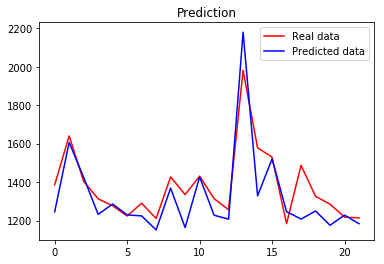

Epoch 1/100
88/88 [==============================] - 5s 52ms/step - loss: 1932445.1165
Epoch 2/100
88/88 [==============================] - 0s 673us/step - loss: 1885532.6562
Epoch 3/100
88/88 [==============================] - 0s 581us/step - loss: 1810220.8068
Epoch 4/100
88/88 [==============================] - 0s 621us/step - loss: 1710746.4716
Epoch 5/100
88/88 [==============================] - 0s 614us/step - loss: 1578441.4659
Epoch 6/100
88/88 [==============================] - 0s 594us/step - loss: 1431863.1534
Epoch 7/100
88/88 [==============================] - 0s 601us/step - loss: 1278778.7855
Epoch 8/100
88/88 [==============================] - 0s 614us/step - loss: 1114642.6122
Epoch 9/100
88/88 [==============================] - 0s 619us/step - loss: 961627.2955
Epoch 10/100
88/88 [==============================] - 0s 592us/step - loss: 806928.0653
Epoch 11/100
88/88 [==============================] - 0s 599us/step - loss: 647298.0398
Epoch 12/100
88/88 [==============

88/88 [==============================] - 0s 628us/step - loss: 23660.2443
Epoch 95/100
88/88 [==============================] - 0s 604us/step - loss: 27171.1038
Epoch 96/100
88/88 [==============================] - 0s 610us/step - loss: 32387.9887
Epoch 97/100
88/88 [==============================] - 0s 625us/step - loss: 26246.0588
Epoch 98/100
88/88 [==============================] - 0s 607us/step - loss: 31076.8351
Epoch 99/100
88/88 [==============================] - 0s 602us/step - loss: 20816.6087
Epoch 100/100
88/88 [==============================] - 0s 603us/step - loss: 19604.4449
The  fifth  neural network results: 


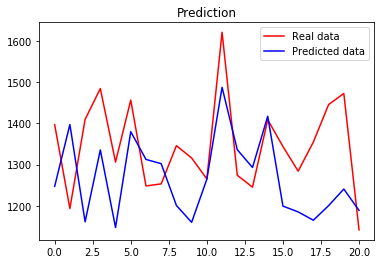

In [36]:
# Splitting the dataset into the Training set and Test set
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.08, random_state = 0)


counter = 1
d = {1:'first', 2:'second', 3:'third', 4:'fourth', 5:'fifth', 
     6: 'sixth', 7: 'seventh', 8: 'eighth', 9: 'ninth', 10: 'tenth' }

kf = KFold(n_splits=5)
for train, test in kf.split(X):
    
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    model = Sequential()

    model.add(Dropout(0.32))
    
    # Adding input layer 
    model.add(Dense(32, activation = 'softplus', input_dim = 8))

    # Adding hidden layer
    model.add(Dense(units = 32, activation = 'softplus'))

    # Adding hidden layer
    model.add(Dense(units = 32, activation = 'softplus'))

    # Adding output layer
    model.add(Dense(units = 1))

    model.compile(optimizer = 'adagrad', loss = 'mean_squared_error')


    model.fit(X_train, Y_train, batch_size = 10, epochs = 100)
    
    print("The ", d[counter], " neural network results: ")
    counter+=1
    
    Y_pred = model.predict(X_test)
    plt.plot(Y_test, color = 'red', label = 'Real data')
    plt.plot(Y_pred, color = 'blue', label = 'Predicted data')
    plt.title('Prediction')
    plt.legend()
    plt.show()
    


Using Dropout Regularization
https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

Others available from keras:
https://keras.io/regularizers/


